#**Time Series Analysis to check Volatility of Share: HDFC Bank: Using  ARCH/GARCH**

#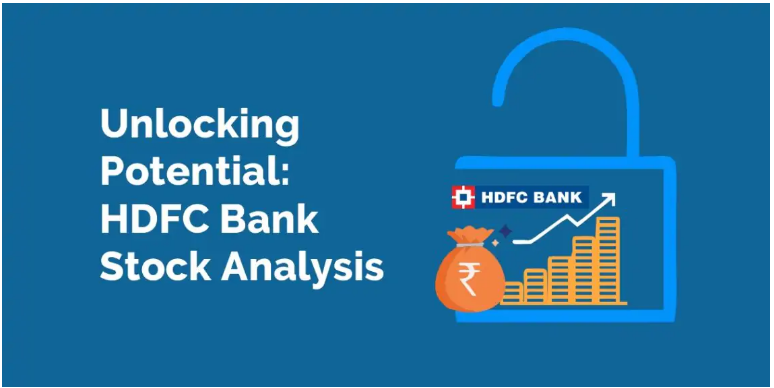

**Introduction:**
Financial markets have been concerned constantly with factors that have impact on both Risk taking and assessing various financial decisions in firms. Hence modelling volatility in financial markets is one of the factors that have direct role and effect on pricing, risk and portfolio management.

Therefore, this study aims to examine the volatility characteristics on HDFC Bank's Financial performance over a period that include; clustering volatility, and its leverage effect. This objective is accomplished by selecting symmetric and asymmetric models from GARCH family models. This study applies; ARCH, GARCH to investigate the behavior of stock return volatility for a certain period.

This method consist in determining the **Variance/Standard deviation** of returns over a period of time which then serves as the estimate volatility of the forthcoming periods (Brooks, 2014)

**Abbreviation: "Volatility":**
Both Volatility and risk are closely related terms in financial assets. In the stock market, volatility refers to the amount and frequency of price fluctuations. Meanwhile, risk refers to the probability of losing money when investing in a particular stock.


**Returns:**
Let's take a small detour to mention the modeling of returns rather than prices. This is a convenient way to model financial assets and as such will be important to conceptualize.

**1.1. Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


**1.2. Import Dataset of HDFC Bank**

In [ ]:
ticker = 'HDFCBANK.NS'
df = yf.download(ticker, start='2018-05-01', end='2023-05-01', rounding= True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.to_csv("Hdfc_dataset")

**1.3. Fetching the data**

In [ ]:
df = pd.read_csv('Hdfc_dataset', index_col='Date', parse_dates=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-02,975.00,989.00,973.00,984.75,931.46,3550024
2018-05-03,984.03,987.45,973.00,983.95,930.71,2076386
2018-05-04,985.00,995.00,983.15,994.25,940.45,3440718
2018-05-07,990.83,993.65,987.50,988.70,935.20,2632064
2018-05-08,989.62,989.95,977.30,983.53,930.31,3550282


**1.4. Data Summary**

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.shape

(1234, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2018-05-02 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1234 non-null   float64
 1   High       1234 non-null   float64
 2   Low        1234 non-null   float64
 3   Close      1234 non-null   float64
 4   Adj Close  1234 non-null   float64
 5   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03
mean,1297.799959,1310.300065,1284.138979,1297.381937,1248.984263,8.767293e+06
std,224.146497,225.285587,223.691697,224.621146,223.517274,6.044328e+06
min,770.450000,810.000000,738.750000,767.700000,736.980000,4.793800e+05
25%,1080.125000,1090.925000,1068.632500,1080.525000,1033.087500,4.963474e+06
50%,1287.575000,1299.000000,1277.750000,1288.225000,1237.725000,6.887011e+06
75%,1496.887500,1509.750000,1483.750000,1497.112500,1445.915000,1.031636e+07
max,1720.000000,1725.000000,1678.150000,1695.500000,1653.690000,5.406435e+07


**1.5. Data Visualisation**

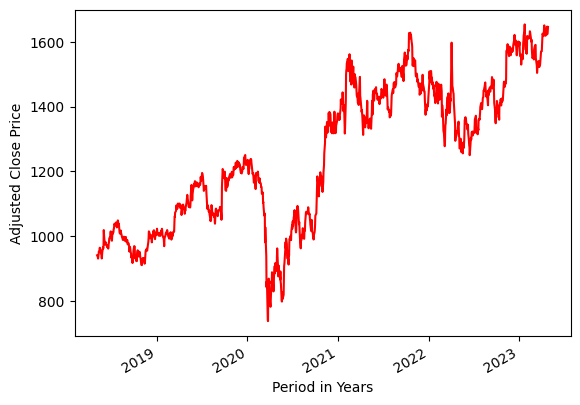

In [ ]:
df['Adj Close'].plot(color='red')
plt.xlabel('Period in Years')
plt.ylabel('Adjusted Close Price')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**1.6. Compute the percentage change between consecutive elements**

In [ ]:
df['Return'] = df['Adj Close'].pct_change()
df.dropna(subset=['Return'], inplace=True)

In [ ]:
! pip install arch
from arch import arch_model

**Model Framework**

The model we will use for this is called auto-regressive conditional heteroskedastic model of order P, ARCH(P).

Recall, in ARMA(p,q) model, we want a homoskedastic model (constant variance across observations). However, in this case, we specify that there is actually heteroskedasticity (non-constant variance). Since volatility is conceptually linked with variance, we are interested in modeling how the variance changes over time.

**1.7. Fitting the ARCH Model**

In [ ]:
model = arch_model(df['Return'], vol='Garch', p=2)

**Model Framework**
GARCH is the generalized auto-regressive conditional heteroskedastic model of order (P,Q) and is an extension of the ARCH(P) model. We notice the additional term shown above when defining the conditional variance (volatility 𝜎ₜ² at time t), which allows for modeling of the conditional variance to be dependent on lagged versions of itself using a linear combination of a₀, a₁, … , aₙ and the conditional variances at previous times. This addition to the model statement makes GARCH models more flexible and able to capture the persistence of volatility

**1.8. Finding the Intercept and slope value**

**1)** ARCH effects: effects attributed to allow for lagged squared log returns Xₜ²

**2)** GARCH effects: effects attributed to allow for lagged conditional variances 𝜎ₜ²

In [ ]:
model_fit = model.fit(disp='off')

Using the GARCH model from above, we are able to forecast volatilities 𝜎ₜ² at time t, which are non-trivial predictions. The model makes these forecasts by accessing data from log returns Xₜ from which 𝜎ₜ₊₁² can be calculated (n-step-ahead forecast). We then use these forecasts to extend the forecast of volatility to times t+1, t+2, …, t+n. We do not continually update Xₜ as time t increases, but rather limit our forecasts for all future dates to be made solely on the current date.

In [ ]:
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3452.53
Distribution:                  Normal   AIC:                          -6895.07
Method:            Maximum Likelihood   BIC:                          -6869.49
                                        No. Observations:                 1231
Date:                Wed, May 29 2024   Df Residuals:                     1230
Time:                        12:25:17   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.9329e-04  4.228e-04      2.113  3.463e-02 [6.

**1.9. Finding the Volatility of Stock**

In [ ]:
# Extract the conditional volatility
volatility = model_fit.conditional_volatility

In [ ]:
# Convert conditional volatility to percentage
volatility_percent = volatility *100

**1.10. Volatility Report**

In [ ]:
volatility_summary_percent = volatility_percent.describe()
print("Volatility Summary Report:")
print(volatility_summary_percent)

Volatility Summary Report:
count    1231.000000
mean        1.544599
std         0.703626
min         0.907750
25%         1.146423
50%         1.302050
75%         1.711304
max         6.061094
Name: cond_vol, dtype: float64


**Its shows by simply using this we can see that there is Average Volatility of 1.3 %  over a given time period**

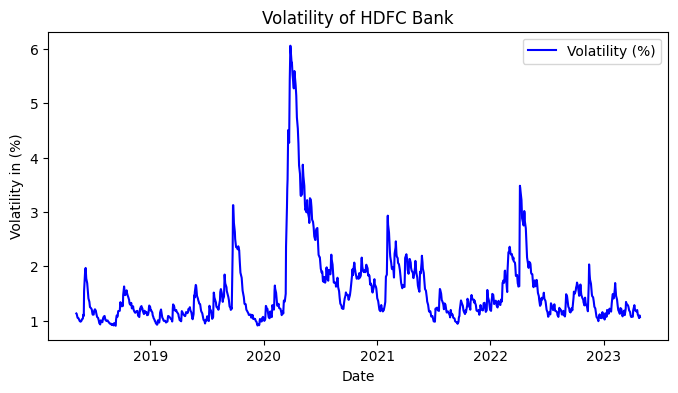

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(volatility_percent, label='Volatility (%)', color='blue')
plt.title('Volatility of HDFC Bank')
plt.xlabel('Date')
plt.ylabel('Volatility in (%)')
plt.legend()
plt.show()